<a href="https://colab.research.google.com/github/Shrey-Viradiya/DiveDeep/blob/master/Prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 4

In [1]:
!nvidia-smi

Mon Apr 26 09:17:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Shrey Viradiya
### 18BCE259

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import sklearn.metrics

In [3]:
def plot_image(image):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.squeeze(), interpolation="nearest")
    plt.axis("off")

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_labels = train_labels.reshape(-1, 1, 1, 10)
test_labels = test_labels.reshape(-1, 1, 1, 10)

valid_images, valid_labels, test_images, test_labels = test_images[0:1000], test_labels[0:1000], test_images[1000:], test_labels[1000:]

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28, 1)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([[[[0., 0., 0., ..., 0., 0., 1.]]],


       [[[1., 0., 0., ..., 0., 0., 0.]]],


       [[[1., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.]]],


       [[[1., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32)

In [8]:
train_labels.shape

(60000, 1, 1, 10)

In [9]:
test_images.shape

(9000, 28, 28, 1)

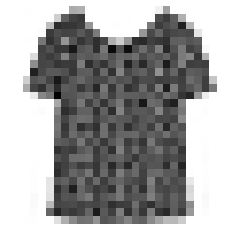

In [10]:
plot_image(test_images[0])

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

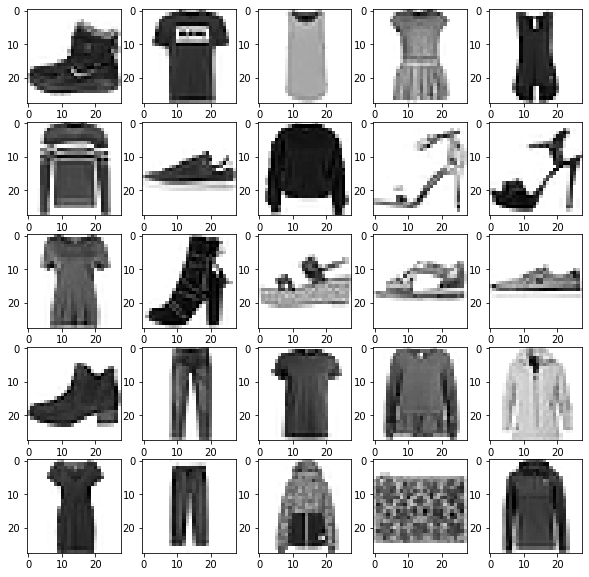

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (7,7), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(48, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(10, (1,1), activation = 'softmax'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 48)          76848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 32)          13856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          330       
Total params: 94,234
Trainable params: 94,234
Non-trainable params: 0
____________________________________________________

In [15]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/30
1875/1875 [==============================] - 42s 6ms/step - loss: 0.8995 - accuracy: 0.6865 - val_loss: 57.1654 - val_accuracy: 0.8170
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4656 - accuracy: 0.8332 - val_loss: 47.7739 - val_accuracy: 0.8560
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3924 - accuracy: 0.8603 - val_loss: 43.6281 - val_accuracy: 0.8520
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3491 - accuracy: 0.8739 - val_loss: 43.7630 - val_accuracy: 0.8590
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3263 - accuracy: 0.8824 - val_loss: 41.7716 - val_accuracy: 0.8610
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3031 - accuracy: 0.8911 - val_loss: 39.5875 - val_accuracy: 0.8790
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2876 - accuracy: 0.8957 - val_loss: 44.1529 -

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 4ms/step - loss: 0.3041 - accuracy: 0.8917

Test accuracy: 0.8916666507720947


In [17]:
predictions = tf.squeeze(tf.argmax(model.predict(test_images), axis=-1))

In [18]:
predictions.shape

TensorShape([9000])

In [19]:
tf.squeeze(tf.argmax(test_labels, axis=-1))

<tf.Tensor: shape=(9000,), dtype=int64, numpy=array([0, 3, 5, ..., 8, 1, 5])>

In [20]:
print(sklearn.metrics.accuracy_score(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.classification_report(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.confusion_matrix(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))

0.8916666666666667
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       863
           1       0.97      0.99      0.98       877
           2       0.90      0.76      0.83      1043
           3       0.93      0.88      0.90       960
           4       0.81      0.83      0.82       857
           5       0.97      0.97      0.97       919
           6       0.65      0.76      0.70       769
           7       0.92      0.96      0.94       866
           8       0.98      0.98      0.98       905
           9       0.98      0.94      0.96       941

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.90      0.89      0.89      9000

[[730   1   8  11   2   0 111   0   0   0]
 [  0 868   1   3   1   0   2   0   2   0]
 [ 39   1 797  20  82   0  96   0   8   0]
 [ 26  18   9 841  37   1  26   0   2   0]
 [  4   3  41  19 715   0  74   0   1   0]
 [  1  

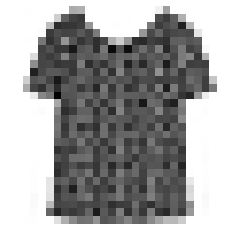

In [21]:
plot_image(test_images[0])

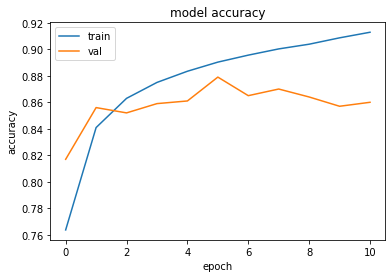

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
inp = tf.keras.layers.Input((28,28,1))
x = tf.keras.layers.Conv2D(64, (7,7), activation = 'relu')(inp)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(48, (5,5), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu')(x)
output = tf.keras.layers.Conv2D(10, (1,1), activation = 'softmax')(x)

model = tf.keras.Model(inputs =[inp], outputs = [output])

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(64, (7,7), activation = 'relu', input_shape = (28,28,1)),
#     tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Conv2D(48, (5,5), activation = 'relu'),
#     tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
#     tf.keras.layers.Conv2D(10, (1,1), activation = 'softmax'),
# ])
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        3200      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 48)          76848     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 48)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 32)          13856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)          330 

In [28]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9103 - accuracy: 0.6827 - val_loss: 55.1455 - val_accuracy: 0.8230
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4586 - accuracy: 0.8363 - val_loss: 45.9866 - val_accuracy: 0.8610
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3865 - accuracy: 0.8642 - val_loss: 45.0156 - val_accuracy: 0.8700
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3519 - accuracy: 0.8764 - val_loss: 48.6625 - val_accuracy: 0.8680
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3235 - accuracy: 0.8841 - val_loss: 38.4592 - val_accuracy: 0.8850
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3056 - accuracy: 0.8901 - val_loss: 38.0985 - val_accuracy: 0.8840
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2850 - accuracy: 0.8991 - val_loss: 39.8427 -

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 4ms/step - loss: 0.2893 - accuracy: 0.8964

Test accuracy: 0.8964444398880005


In [30]:
predictions = tf.squeeze(tf.argmax(model.predict(test_images), axis=-1))

In [31]:
predictions.shape

TensorShape([9000])

In [32]:
tf.squeeze(tf.argmax(test_labels, axis=-1))

<tf.Tensor: shape=(9000,), dtype=int64, numpy=array([0, 3, 5, ..., 8, 1, 5])>

In [33]:
print(sklearn.metrics.accuracy_score(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.classification_report(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))
print(sklearn.metrics.confusion_matrix(predictions, tf.squeeze(tf.argmax(test_labels, axis=-1))))

0.8964444444444445
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       881
           1       0.97      1.00      0.98       872
           2       0.84      0.84      0.84       888
           3       0.91      0.90      0.91       911
           4       0.87      0.81      0.84       953
           5       0.97      0.98      0.98       909
           6       0.68      0.72      0.70       853
           7       0.98      0.92      0.95       964
           8       0.97      0.97      0.97       912
           9       0.93      0.99      0.96       857

    accuracy                           0.90      9000
   macro avg       0.90      0.90      0.90      9000
weighted avg       0.90      0.90      0.90      9000

[[744   2  17  15   1   0  99   0   2   1]
 [  0 869   1   1   0   0   1   0   0   0]
 [ 11   0 744  12  45   0  69   0   7   0]
 [ 15  14   9 824  25   0  21   0   3   0]
 [  3   3  64  25 769   0  85   0   4   0]
 [  1  

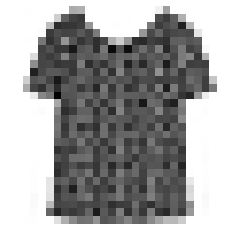

In [34]:
plot_image(test_images[0])

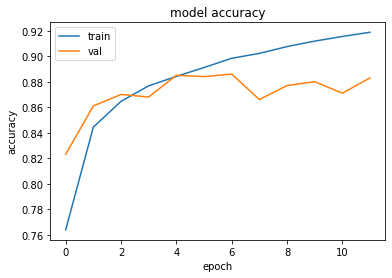

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()